In [2]:
# Preamble, notebook setup and imports

%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import plot_utils

In [18]:
tfs = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/MacIsaac_sacCer3_liftOver_Abf1_Reb1.bed',sep = '\t', header = None)


In [19]:
tfs

0       1       2     3  4  5
0      chrI   45319   45332  ABF1  0  -
1      chrI   45499   45512  ABF1  0  -
2      chrI   61164   61177  ABF1  0  -
3      chrI   62658   62671  ABF1  0  -
4      chrI   87163   87171  REB1  0  +
..      ...     ...     ...   ... .. ..
302  chrXVI  736821  736834  ABF1  0  +
303  chrXVI  770866  770874  REB1  0  +
304  chrXVI  792552  792565  ABF1  0  -
305  chrXVI  870538  870546  REB1  0  -
306  chrXVI  892204  892217  ABF1  0  -

[307 rows x 6 columns]

In [20]:
#Abf1 modification
tfs.loc[(tfs[3] == 'ABF1') & (tfs[5] == '+'), 2] += 1
tfs.loc[(tfs[3] == 'ABF1') & (tfs[5] == '-'), 1] -= 1

#Reb1 modification
tfs.loc[(tfs[3] == 'REB1') & (tfs[5] == '+'), 2] += 1
tfs.loc[(tfs[3] == 'REB1') & (tfs[5] == '+'), 1] += 1
tfs.loc[(tfs[3] == 'REB1') & (tfs[5] == '-'), 2] -= 1
tfs.loc[(tfs[3] == 'REB1') & (tfs[5] == '-'), 1] -= 1

In [22]:
tfs.to_csv('MacIsaac_sacCer3_liftOver_Abf1_Reb1_match_PWM.bed', sep='\t', header=False, index=False)

In [5]:
tfs = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/MacIsaac_sacCer3_liftOver_Abf1_Reb1.bed',sep = '\t', header = None)
tfs = tfs.rename(columns = {0: 'Chromosome', 1: 'start', 2: 'end', 3: 'tf_name', 4: 'score', 5: 'Strand'})
tfs['pos'] = tfs['start'] + 1

In [18]:
tfs_positive = tfs.loc[tfs['Strand'] == '+']
tfs_positive_abf1 = tfs_positive.loc[tfs_positive['tf_name'] == 'ABF1']
tfs_negative = tfs.loc[tfs['Strand'] == '-']
tfs_negative_abf1 = tfs_negative.loc[tfs_negative['tf_name'] == 'ABF1']


tfs_positive_abf1

Chromosome   start     end tf_name  score Strand     pos
11       chrII  297938  297951    ABF1      0      +  297939
13       chrII  401011  401024    ABF1      0      +  401012
18       chrII  495468  495481    ABF1      0      +  495469
23       chrII  647324  647337    ABF1      0      +  647325
25       chrII  770734  770747    ABF1      0      +  770735
..         ...     ...     ...     ...    ...    ...     ...
284      chrXV  817136  817149    ABF1      0      +  817137
286      chrXV  898520  898533    ABF1      0      +  898521
294     chrXVI  251909  251922    ABF1      0      +  251910
296     chrXVI  529476  529489    ABF1      0      +  529477
302     chrXVI  736821  736834    ABF1      0      +  736822

[77 rows x 7 columns]

(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   A  A  A  T  T  T  T  C  A  A  ...  A  C  T  G  T  C  A  A  A  T
 1   T  C  G  A  A  A  T  T  T  G  ...  A  T  A  C  C  G  A  A  T  T
 2   C  A  T  T  A  T  A  G  T  A  ...  A  C  C  G  A  A  A  G  T  G
 3   G  A  T  A  C  A  C  C  A  T  ...  A  T  A  A  A  A  T  A  T  T
 4   T  C  T  T  T  T  C  T  T  T  ...  A  T  A  C  A  G  A  T  C  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 72  A  C  T  T  T  A  G  T  A  A  ...  A  T  T  A  G  G  A  A  T  A
 73  T  T  T  C  T  T  T  T  T  T  ...  A  T  A  T  C  A  A  T  A  T
 74  A  C  A  G  A  A  T  A  G  G  ...  A  T  A  A  A  A  G  G  C  G
 75  G  T  G  T  A  C  T  A  T  T  ...  A  T  A  G  A  T  G  A  T  C
 76  T  A  A  T  T  T  C  C  A  G  ...  A  T  A  G  T  A  T  G  G  C
 
 [77 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.350649  0.272727  0.389610  0.311688  0.311688  0.311688  0.337

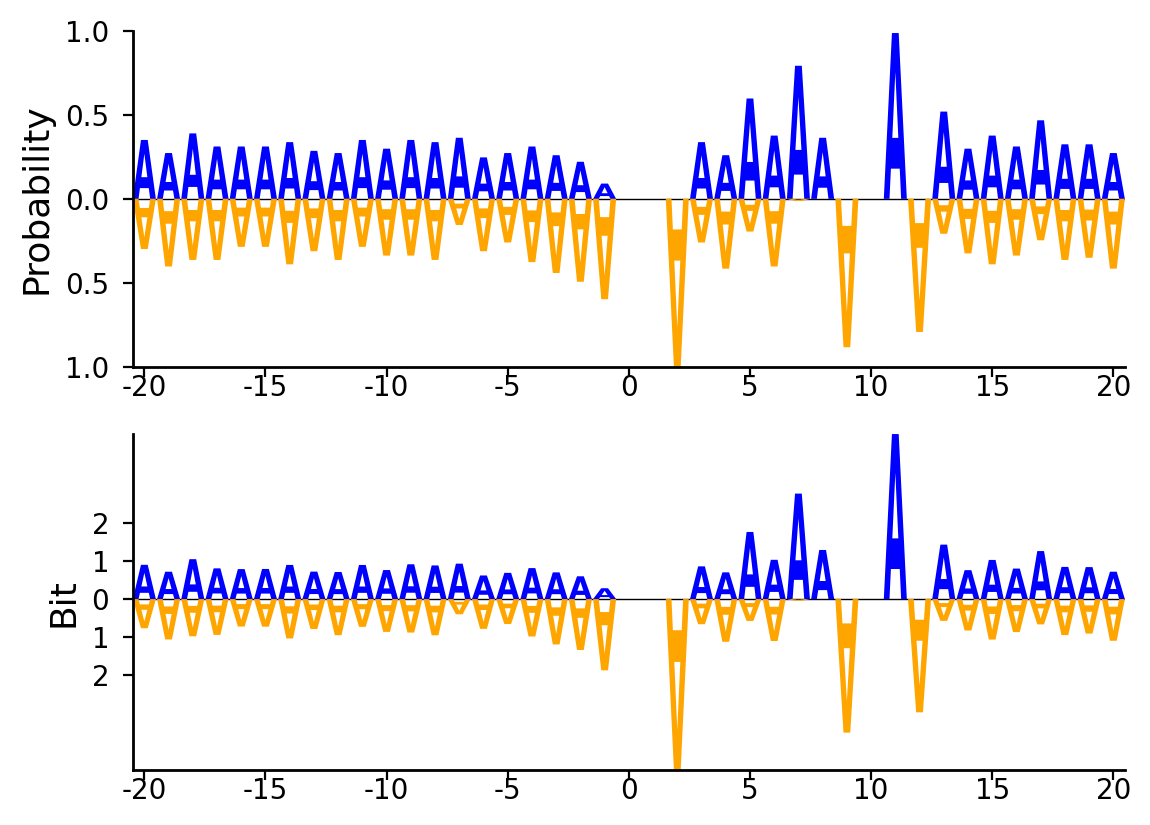

In [19]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_abf1,40,0,ax['A'],ax['B'],'roman',bases='A')

(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   A  A  A  T  T  T  T  C  A  A  ...  A  C  T  G  T  C  A  A  A  T
 1   T  C  G  A  A  A  T  T  T  G  ...  A  T  A  C  C  G  A  A  T  T
 2   C  A  T  T  A  T  A  G  T  A  ...  A  C  C  G  A  A  A  G  T  G
 3   G  A  T  A  C  A  C  C  A  T  ...  A  T  A  A  A  A  T  A  T  T
 4   T  C  T  T  T  T  C  T  T  T  ...  A  T  A  C  A  G  A  T  C  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 72  A  C  T  T  T  A  G  T  A  A  ...  A  T  T  A  G  G  A  A  T  A
 73  T  T  T  C  T  T  T  T  T  T  ...  A  T  A  T  C  A  A  T  A  T
 74  A  C  A  G  A  A  T  A  G  G  ...  A  T  A  A  A  A  G  G  C  G
 75  G  T  G  T  A  C  T  A  T  T  ...  A  T  A  G  A  T  G  A  T  C
 76  T  A  A  T  T  T  C  C  A  G  ...  A  T  A  G  T  A  T  G  G  C
 
 [77 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.350649  0.272727  0.389610  0.311688  0.311688  0.311688  0.337

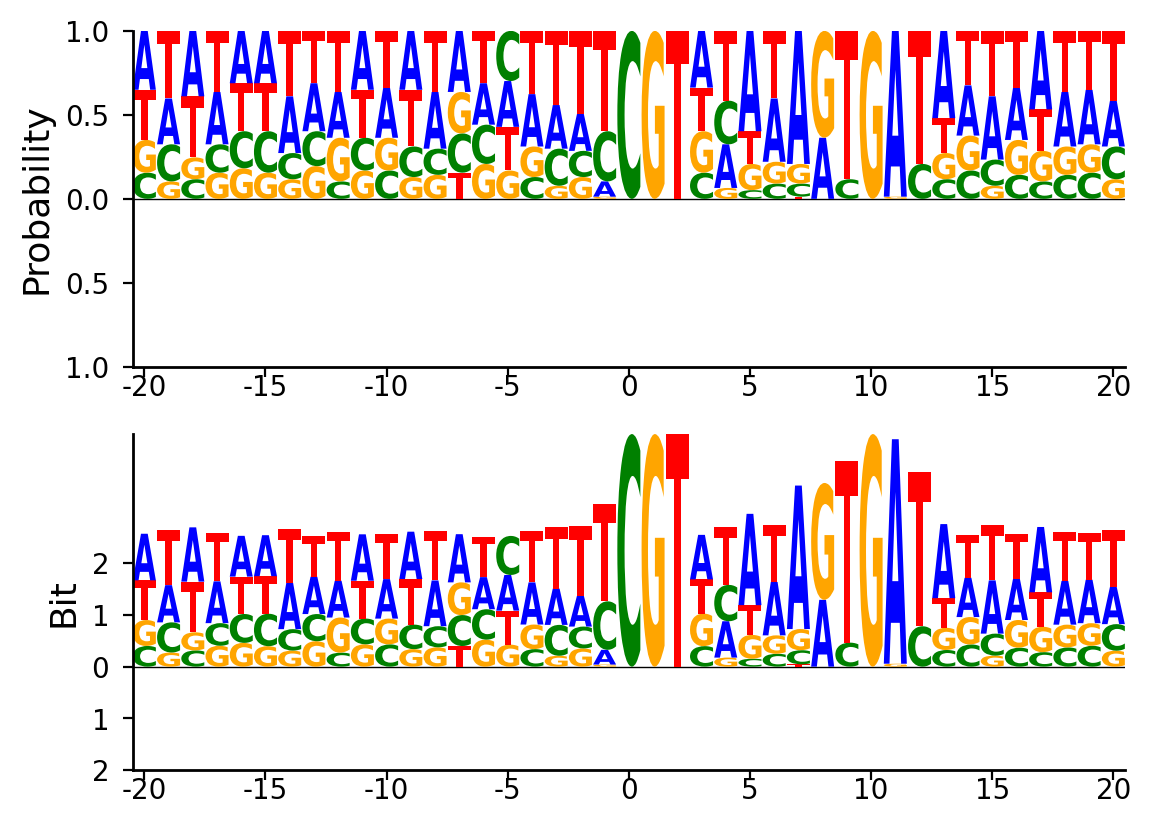

In [21]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   T  G  A  C  A  T  G  C  C  G  ...  C  T  T  T  T  T  T  T  C  T
 1   T  G  C  A  C  A  T  A  C  G  ...  A  T  G  G  C  A  C  G  T  G
 2   G  T  T  C  A  A  G  T  C  G  ...  A  G  T  G  A  A  A  A  G  T
 3   G  C  G  A  T  T  A  T  C  G  ...  G  T  A  G  T  G  A  T  A  T
 4   T  A  A  T  A  T  C  T  C  G  ...  A  T  T  A  T  T  G  G  A  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 69  T  C  A  A  A  A  C  T  C  G  ...  T  G  A  T  G  T  T  A  T  G
 70  G  T  T  T  A  T  T  T  C  G  ...  C  A  T  T  A  A  T  A  G  C
 71  G  T  C  A  T  T  G  T  C  G  ...  T  C  A  T  T  T  T  A  A  T
 72  T  T  T  T  C  C  A  C  C  G  ...  T  A  C  T  G  G  A  C  T  G
 73  A  A  C  A  T  T  T  C  C  G  ...  A  T  A  G  C  G  A  T  A  G
 
 [74 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.324324  0.216216  0.310811  0.324324  0.270270  0.297297  0.297

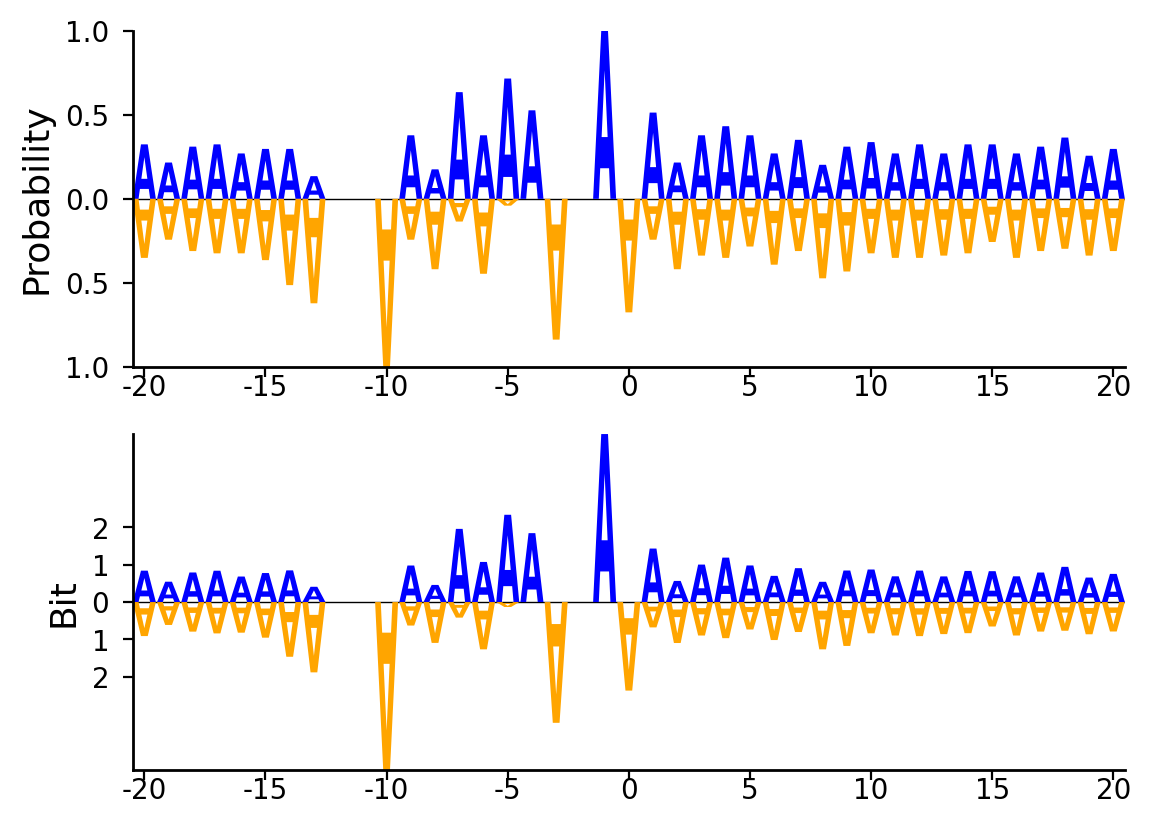

In [20]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman',bases='A')

(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   T  G  A  C  A  T  G  C  C  G  ...  C  T  T  T  T  T  T  T  C  T
 1   T  G  C  A  C  A  T  A  C  G  ...  A  T  G  G  C  A  C  G  T  G
 2   G  T  T  C  A  A  G  T  C  G  ...  A  G  T  G  A  A  A  A  G  T
 3   G  C  G  A  T  T  A  T  C  G  ...  G  T  A  G  T  G  A  T  A  T
 4   T  A  A  T  A  T  C  T  C  G  ...  A  T  T  A  T  T  G  G  A  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 69  T  C  A  A  A  A  C  T  C  G  ...  T  G  A  T  G  T  T  A  T  G
 70  G  T  T  T  A  T  T  T  C  G  ...  C  A  T  T  A  A  T  A  G  C
 71  G  T  C  A  T  T  G  T  C  G  ...  T  C  A  T  T  T  T  A  A  T
 72  T  T  T  T  C  C  A  C  C  G  ...  T  A  C  T  G  G  A  C  T  G
 73  A  A  C  A  T  T  T  C  C  G  ...  A  T  A  G  C  G  A  T  A  G
 
 [74 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.324324  0.216216  0.310811  0.324324  0.270270  0.297297  0.297

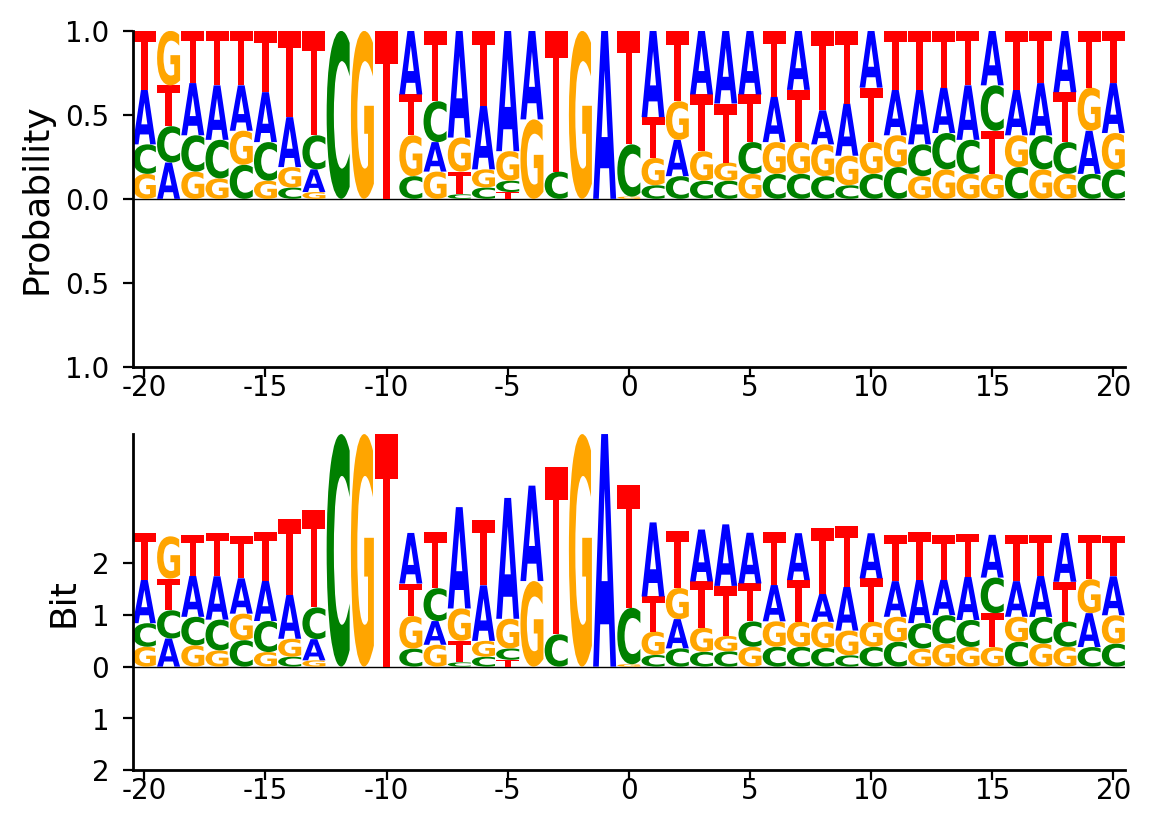

In [22]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

In [23]:
tfs_negative_abf1.drop(columns = ['Strand'], inplace = True)

/home/rapiduser/miniconda3/envs/bob/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   A  G  A  A  A  A  A  A  A  G  ...  C  G  G  C  A  T  G  T  C  A
 1   C  A  C  G  T  G  C  C  A  T  ...  C  G  T  A  T  G  T  G  C  A
 2   A  C  T  T  T  T  C  A  C  T  ...  C  G  A  C  T  T  G  A  A  C
 3   A  T  A  T  C  A  C  T  A  C  ...  C  G  A  T  A  A  T  C  G  C
 4   G  T  C  C  A  A  T  A  A  T  ...  C  G  A  G  A  T  A  T  T  A
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 69  C  A  T  A  A  C  A  T  C  A  ...  C  G  A  G  T  T  T  T  G  A
 70  G  C  T  A  T  T  A  A  T  G  ...  C  G  A  A  A  T  A  A  A  C
 71  A  T  T  A  A  A  A  T  G  A  ...  C  G  A  C  A  A  T  G  A  C
 72  C  A  G  T  C  C  A  G  T  A  ...  C  G  G  T  G  G  A  A  A  A
 73  C  T  A  T  C  G  C  T  A  T  ...  C  G  G  A  A  A  T  G  T  T
 
 [74 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.310811  0.337838  0.297297  0.310811  0.351351  0.256757  0.324

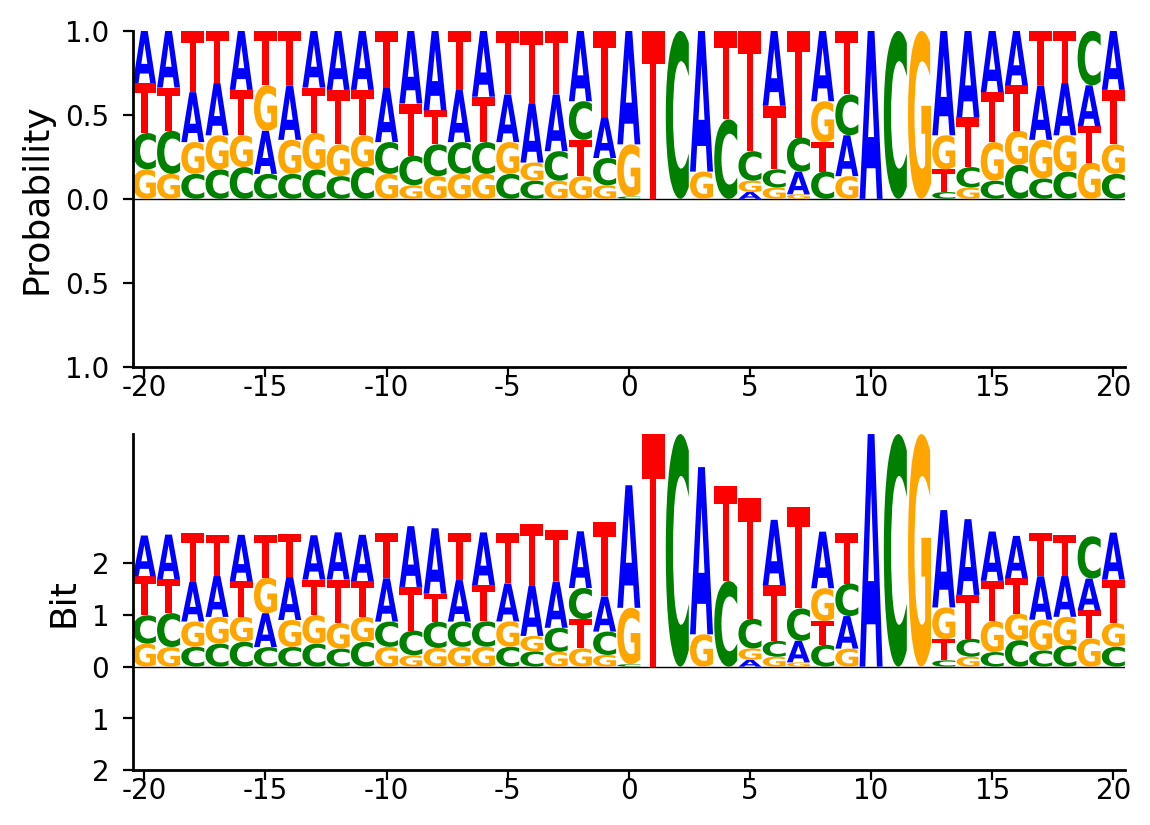

In [24]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

In [1]:
import logomaker

In [11]:
from io import StringIO

bob = '''
  0.587400	  0.009100	  0.398500	  0.005000
  0.003500	  0.004300	  0.037100	  0.955100
  0.027900	  0.964200	  0.003600	  0.004300
  0.886600	  0.029300	  0.072900	  0.011200
  0.009100	  0.647700	  0.010500	  0.332700
  0.333700	  0.201800	  0.331600	  0.132900
  0.039400	  0.420000	  0.021300	  0.519300
  0.068100	  0.421600	  0.430800	  0.079500
  0.062400	  0.431100	  0.442000	  0.064500
  0.179600	  0.641400	  0.046300	  0.132700
  0.986400	  0.002300	  0.004900	  0.006400
  0.006300	  0.985700	  0.003900	  0.004100
  0.011000	  0.001300	  0.979500	  0.008200
  0.844400	  0.008100	  0.106800	  0.040700
  '''
 # Read the string into a pandas dataframe
crp_df = pd.read_csv(StringIO(bob), sep="\t", header=None)

In [14]:
crp_df.columns = ['A', 'C', 'G', 'T']

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


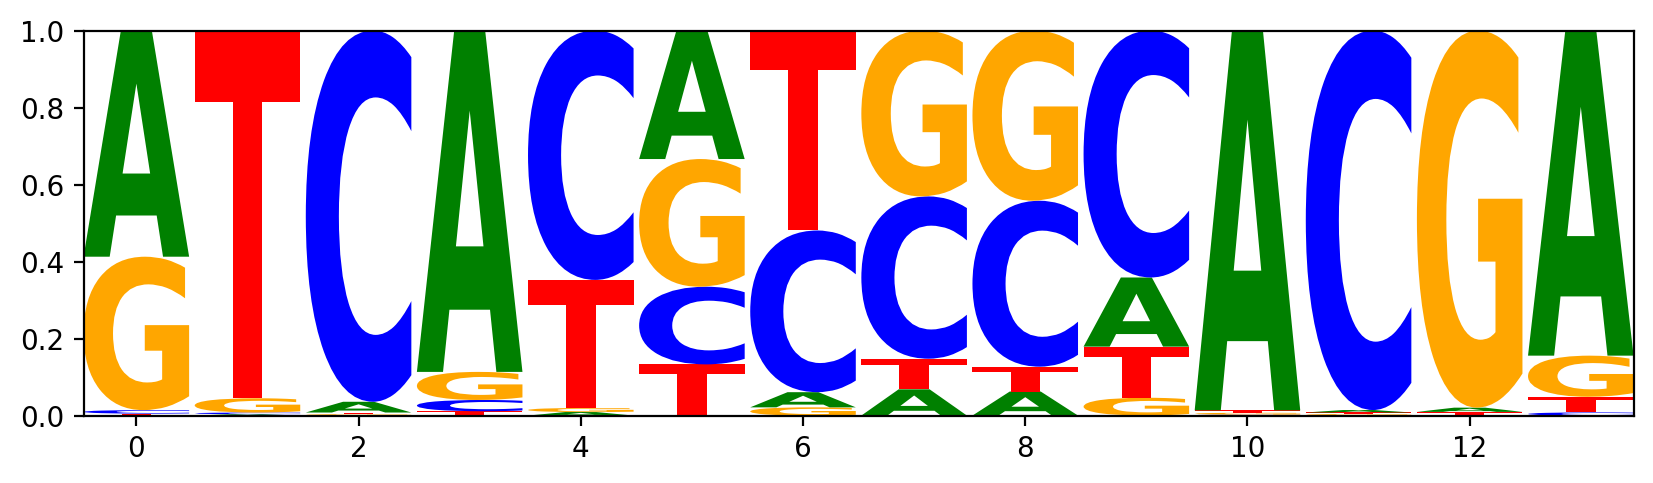

In [15]:
logo = logomaker.Logo(crp_df, font_name = 'Arial Rounded MT Bold')

# REB1

In [28]:
tfs_positive = tfs.loc[tfs['Strand'] == '+']
tfs_positive_abf1 = tfs_positive.loc[tfs_positive['tf_name'] == 'REB1']
tfs_negative = tfs.loc[tfs['Strand'] == '-']
tfs_negative_abf1 = tfs_negative.loc[tfs_negative['tf_name'] == 'REB1']

(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   G  C  T  G  T  T  T  C  A  A  ...  A  C  A  T  T  T  T  T  A  A
 1   A  A  T  C  C  C  C  C  T  C  ...  T  T  G  T  G  T  A  G  T  T
 2   C  C  G  A  A  C  A  A  A  A  ...  T  T  T  A  G  C  C  T  A  T
 3   G  A  A  G  G  T  A  G  T  G  ...  G  G  A  A  A  A  T  A  A  G
 4   G  A  C  A  A  A  A  A  C  T  ...  C  G  C  G  A  T  T  T  T  T
 5   T  T  A  G  A  A  A  A  T  T  ...  T  A  T  G  G  G  G  A  A  A
 6   G  T  C  A  T  G  C  G  G  G  ...  T  A  T  G  A  T  A  G  T  C
 7   T  C  T  T  T  A  G  T  G  A  ...  A  G  G  T  C  C  G  G  G  T
 8   T  A  T  G  A  T  G  A  C  A  ...  G  G  A  C  T  T  T  A  C  A
 9   A  A  T  A  A  T  C  T  C  G  ...  T  C  T  C  T  G  T  C  T  T
 10  G  T  G  T  G  T  A  G  C  G  ...  A  A  A  C  C  T  A  C  A  T
 11  G  C  G  G  G  T  A  A  C  A  ...  T  A  T  T  G  C  G  G  G  T
 12  A  A  A  C  C  C  C  T  A  A  ...  C  T  A  A  C  A  G  C  G  A
 13  A  G  A  C  G  C  C  C  G  T 

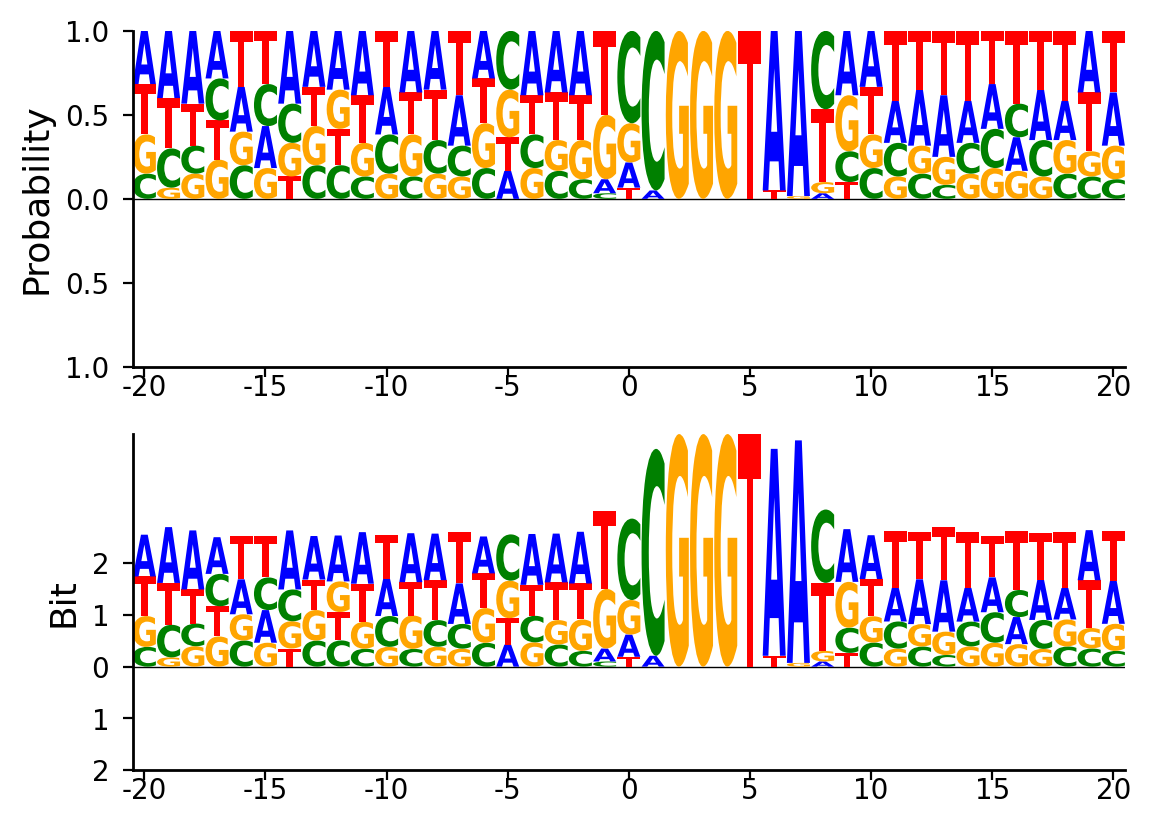

In [29]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

In [30]:
tfs_negative_abf1.drop(columns = ['Strand'], inplace = True)

/home/rapiduser/miniconda3/envs/bob/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


(   0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0   C  C  T  C  T  G  A  T  C  A  ...  C  T  G  A  T  C  A  T  G  T
 1   T  T  T  T  A  C  C  A  G  A  ...  C  G  G  T  C  C  T  C  T  T
 2   T  T  C  A  A  T  T  G  G  A  ...  G  T  A  C  G  A  T  G  C  A
 3   A  A  A  T  G  G  G  T  A  G  ...  A  A  A  A  C  G  T  C  A  A
 4   T  T  C  A  G  C  A  T  G  A  ...  G  C  G  C  A  C  C  A  A  C
 .. .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 91  T  C  A  T  T  A  G  T  A  G  ...  G  G  G  A  T  T  T  T  G  C
 92  C  T  G  T  G  T  T  A  A  G  ...  G  T  G  A  A  C  G  G  C  T
 93  T  A  C  G  T  C  G  T  A  C  ...  T  G  A  G  G  G  T  T  T  T
 94  A  T  A  T  G  A  C  C  T  C  ...  A  C  A  C  C  C  T  G  C  A
 95  A  C  C  A  A  A  G  G  A  A  ...  T  T  A  T  C  G  G  G  A  A
 
 [96 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.375000  0.395833  0.406250  0.333333  0.375000  0.354167  0.333

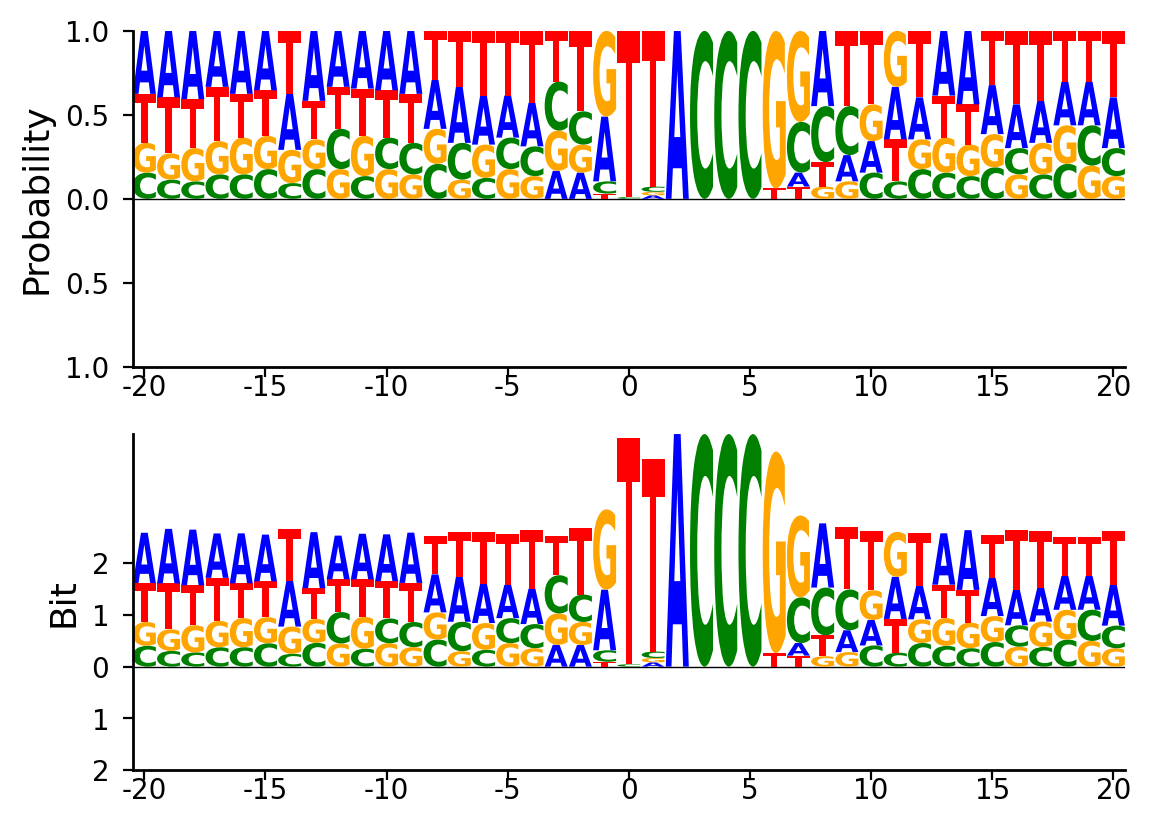

In [31]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

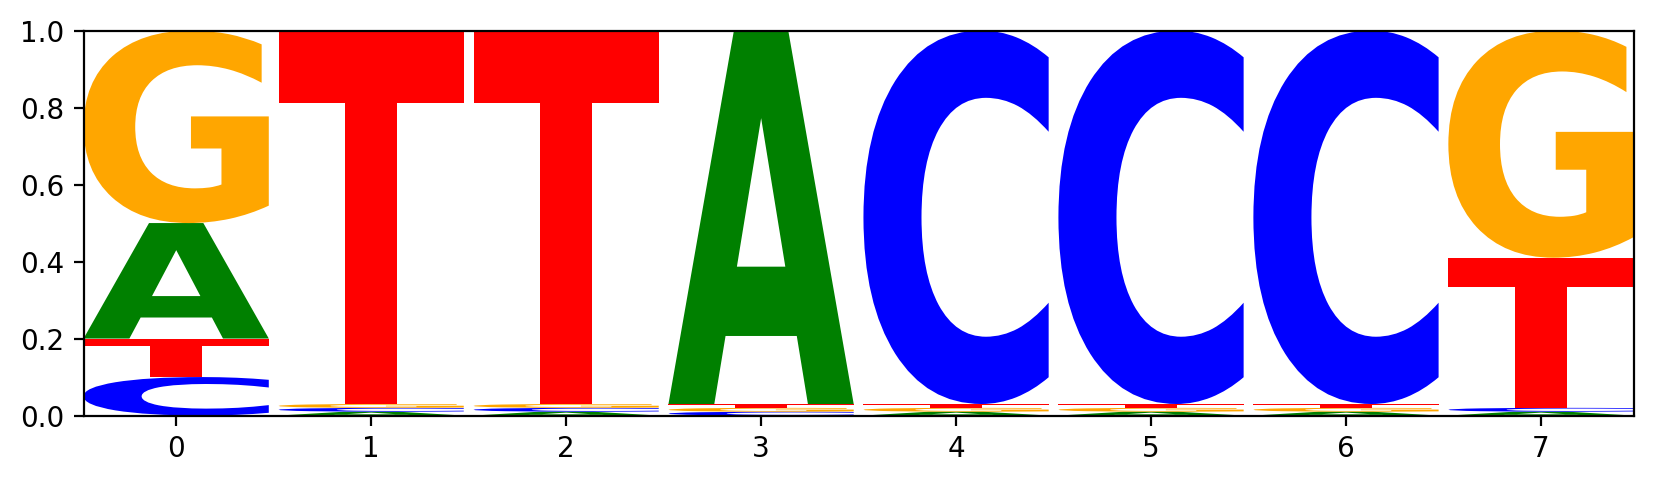

In [26]:
from io import StringIO

bob = '''
  0.300000	  0.100000	  0.500000	  0.100000
  0.010000	  0.010000	  0.010000	  0.970000
  0.010000	  0.010000	  0.010000	  0.970000
  0.970000	  0.010000	  0.010000	  0.010000
  0.010000	  0.970000	  0.010000	  0.010000
  0.010000	  0.970000	  0.010000	  0.010000
  0.010000	  0.970000	  0.010000	  0.010000
  0.010000	  0.010000	  0.590000	  0.390000
  '''
 # Read the string into a pandas dataframe
crp_df = pd.read_csv(StringIO(bob), sep="\t", header=None)

crp_df.columns = ['A', 'C', 'G', 'T']

logo = logomaker.Logo(crp_df, font_name = 'Arial Rounded MT Bold')

# Okay try Rossi Sites

In [3]:
tfs = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/abf1_rossi_peak_w_strand.bed',sep = '\t')
tfs = tfs.rename(columns = {'chr': 'Chromosome', 'strand': 'Strand'})
tfs['Chromosome'] = tfs['Chromosome'].apply(lambda x: 'chr' + plot_utils.to_roman(int(x.split('chr')[1])) if 'chr' in x else x)
# turn BED 0 indexed into 1 indexed
tfs['pos'] = tfs['start'] + 1

tfs_motif1 = tfs.loc[tfs['motif'] == 1]

tfs_positive = tfs.loc[tfs['Strand'] == '+']
tfs_positive_motif1 = tfs_positive.loc[tfs_positive['motif'] == 1]
#tfs_positive_abf1 = tfs_positive.loc[tfs_positive['tf_name'] == 'REB1']
tfs_negative = tfs.loc[tfs['Strand'] == '-']
tfs_negative_motif1 = tfs_negative.loc[tfs_negative['motif'] == 1]

#tfs_negative_abf1 = tfs_negative.loc[tfs_negative['tf_name'] == 'REB1']

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    T  C  G  T  A  C  C  A  A  G  ...  G  G  A  G  G  A  A  G  G  C
 1    T  T  T  A  T  A  T  G  T  G  ...  A  T  T  T  C  T  A  G  T  A
 2    A  T  C  A  C  G  T  G  C  C  ...  G  G  T  T  C  T  T  T  G  C
 3    T  G  T  G  G  C  T  G  T  C  ...  C  C  A  T  A  A  C  G  A  T
 4    T  G  A  A  A  C  A  T  A  A  ...  A  A  T  A  A  T  A  G  A  T
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 263  C  T  C  T  T  C  A  C  G  C  ...  C  G  C  C  G  G  C  G  C  T
 264  T  T  T  C  G  A  T  G  C  C  ...  G  C  C  C  T  T  T  G  A  T
 265  A  T  T  T  T  A  G  T  T  A  ...  A  T  A  A  A  G  G  A  A  A
 266  A  G  G  T  C  A  G  G  A  A  ...  C  C  C  C  T  C  A  C  G  T
 267  A  C  A  A  G  T  A  C  T  G  ...  A  T  G  C  G  T  T  T  T  A
 
 [268 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.317164  0.320896  0.309701  0.279851  0.250000  0.

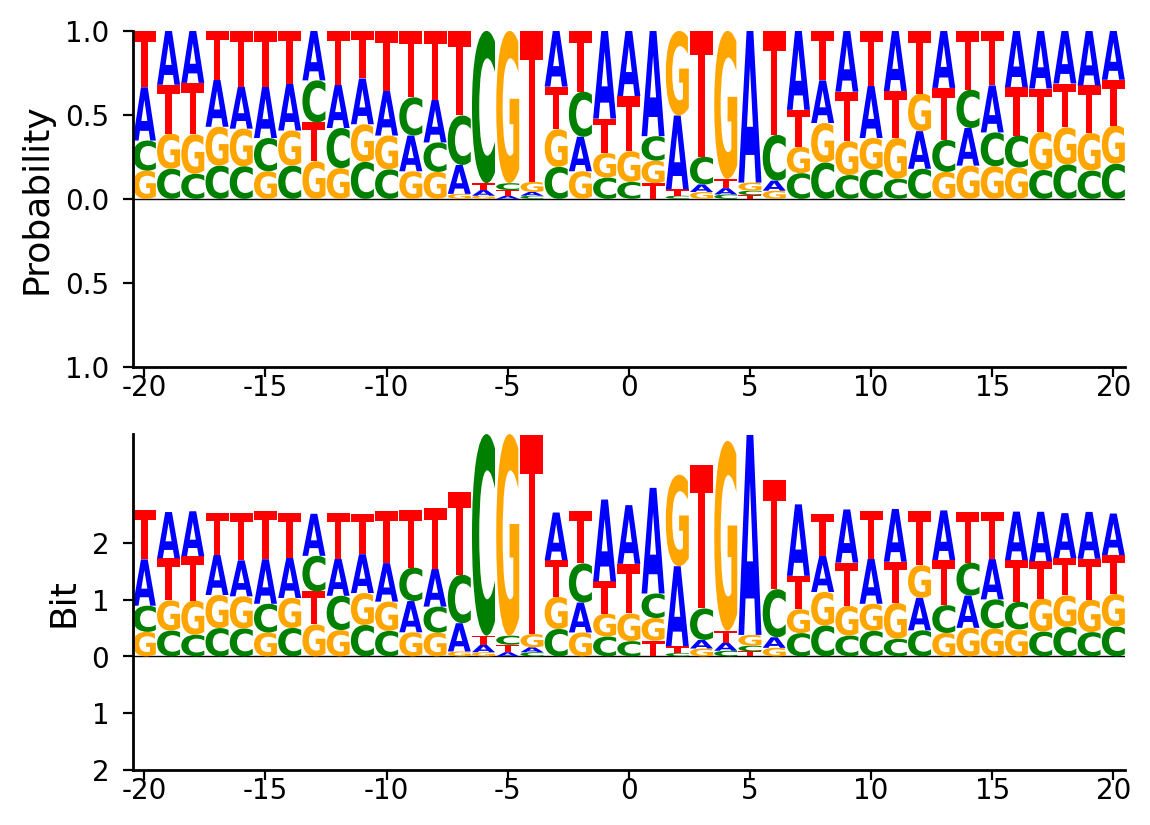

In [6]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_motif1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    G  G  G  C  A  A  C  T  A  T  ...  C  T  C  A  A  A  T  G  T  G
 1    C  A  A  G  A  G  A  G  C  A  ...  A  A  A  T  G  G  T  T  G  T
 2    T  A  T  G  G  C  C  T  T  A  ...  A  T  A  C  G  A  G  C  C  T
 3    C  T  T  G  C  G  C  G  A  T  ...  C  C  A  A  A  T  A  A  T  A
 4    T  G  C  T  T  C  C  A  C  T  ...  T  C  A  G  T  G  A  C  C  C
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 223  C  T  T  T  T  T  A  G  G  A  ...  T  C  G  G  A  G  G  T  G  A
 224  C  A  A  A  G  C  A  A  A  A  ...  G  G  C  C  C  G  T  A  T  C
 225  T  C  G  G  G  C  G  G  A  T  ...  C  A  C  G  C  T  G  A  A  G
 226  G  A  G  T  G  G  G  G  G  G  ...  T  T  T  T  T  C  A  G  A  A
 227  G  C  C  C  A  C  G  T  A  C  ...  C  C  C  T  G  C  G  C  A  C
 
 [228 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.293860  0.377193  0.328947  0.289474  0.350877  0.

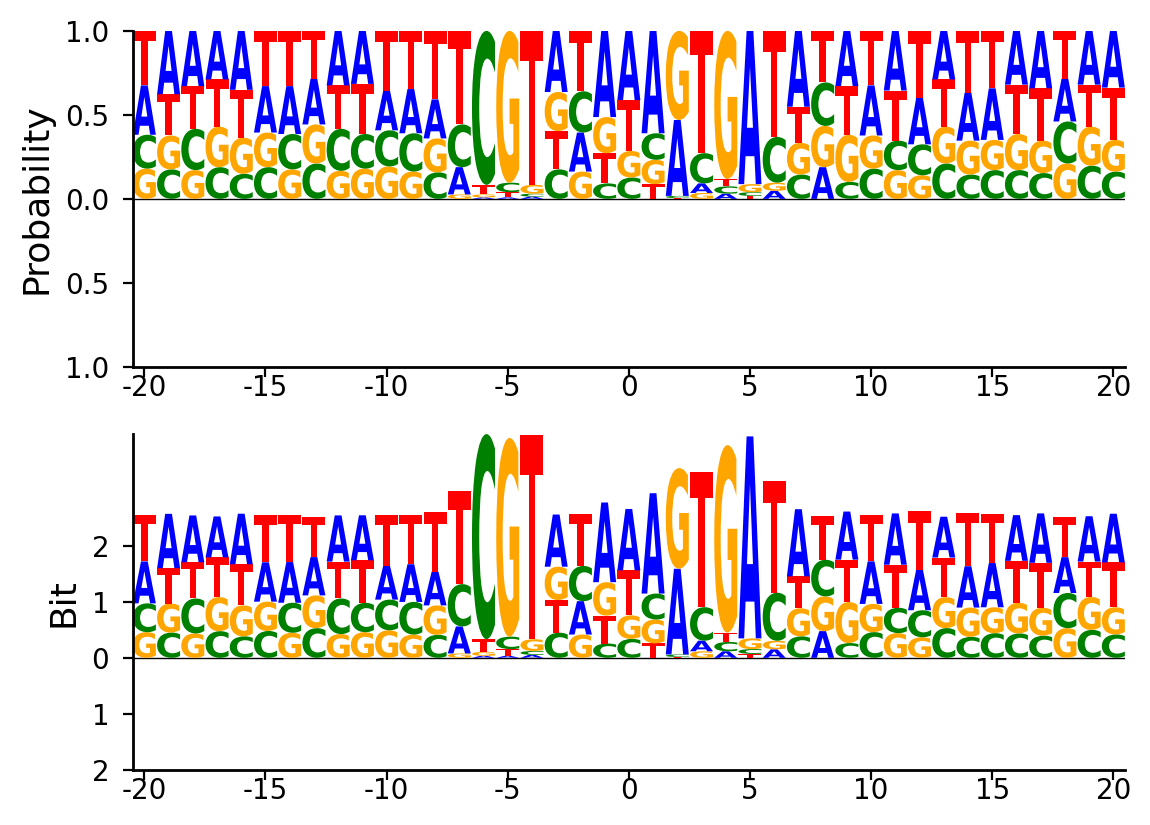

In [11]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_motif1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    T  C  G  T  A  C  C  A  A  G  ...  G  G  A  G  G  A  A  G  G  C
 1    T  T  T  A  T  A  T  G  T  G  ...  A  T  T  T  C  T  A  G  T  A
 2    A  T  C  A  C  G  T  G  C  C  ...  G  G  T  T  C  T  T  T  G  C
 3    T  G  T  G  G  C  T  G  T  C  ...  C  C  A  T  A  A  C  G  A  T
 4    G  G  G  C  A  A  C  T  A  T  ...  C  T  C  A  A  A  T  G  T  G
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 491  A  T  T  T  T  A  G  T  T  A  ...  A  T  A  A  A  G  G  A  A  A
 492  A  G  G  T  C  A  G  G  A  A  ...  C  C  C  C  T  C  A  C  G  T
 493  G  A  G  T  G  G  G  G  G  G  ...  T  T  T  T  T  C  A  G  A  A
 494  G  C  C  C  A  C  G  T  A  C  ...  C  C  C  T  G  C  G  C  A  C
 495  A  C  A  A  G  T  A  C  T  G  ...  A  T  G  C  G  T  T  T  T  A
 
 [496 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.306452  0.346774  0.318548  0.284274  0.296371  0.

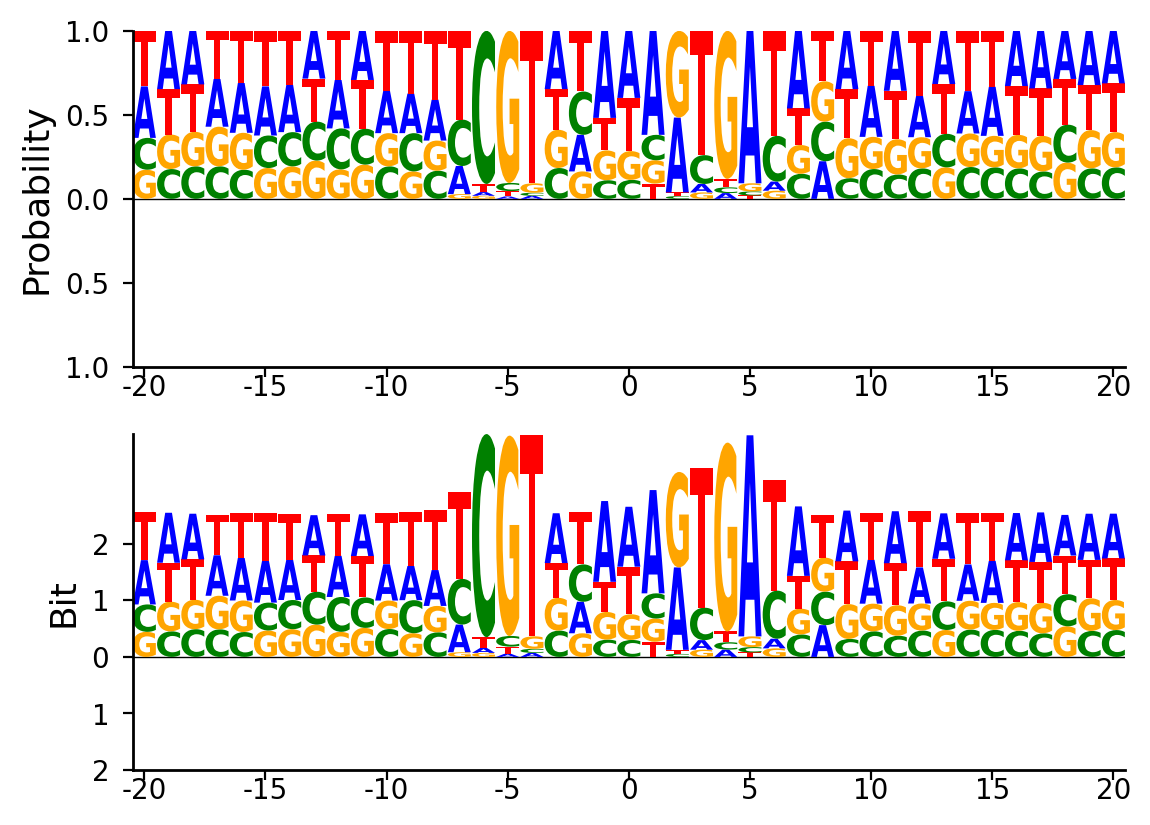

In [14]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_motif1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

In [3]:
bed_df = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/rossi_peak_w_strand_all_TFs.bed', sep="\t")

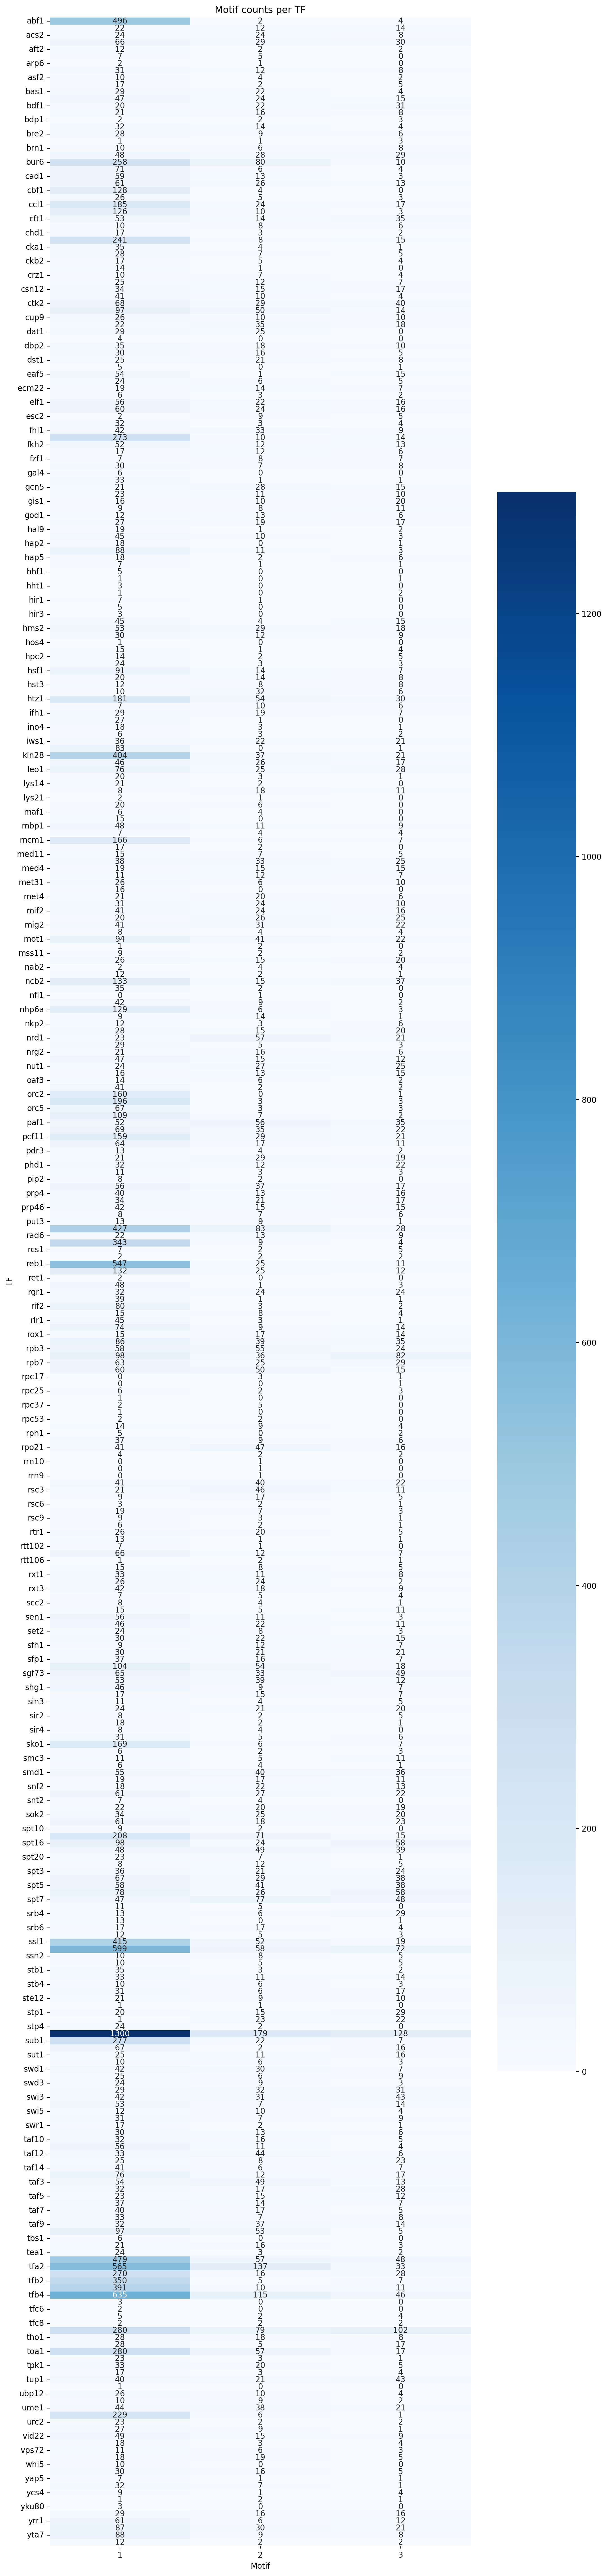

In [11]:
# Collapse groupby to just counts
motif_counts = bed_df.groupby(['TF','motif']).size().reset_index(name='count')

# Pivot for heatmap style (TF x motif)
pivot = motif_counts.pivot(index='TF', columns='motif', values='count').fillna(0)

plt.figure(figsize=(12,58))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="Blues")
plt.title("Motif counts per TF")
plt.ylabel("TF")
plt.xlabel("Motif")
plt.show()

# plt.figure(figsize=(14,6))
# sns.barplot(data=motif_counts, x="TF", y="count", hue="motif")
# plt.xticks(rotation=90)
# plt.title("Motif counts per TF")
# plt.show()

# Okay now after conforming to roboCOP PWM, we plot these rossi sites locations

In [4]:
tfs = pd.read_csv('/home/rapiduser/programs/RoboCOP/analysis/inputs/rossi_peak_w_strand_conformed_to_PWM_all_TFs_peakVal.bed',sep = '\t')
tfs = tfs.rename(columns = {'chr': 'Chromosome', 'strand': 'Strand'})
# tfs['Chromosome'] = tfs['Chromosome'].apply(lambda x: 'chr' + plot_utils.to_roman(int(x.split('chr')[1])) if 'chr' in x else x)
# # turn BED 0 indexed into 1 indexed
tfs['pos'] = tfs['start'] + 1

# tfs_motif1 = tfs.loc[tfs['motif'] == 1]

tfs_positive = tfs.loc[tfs['Strand'] == '+']
# tfs_positive_motif1 = tfs_positive.loc[tfs_positive['motif'] == 1]
tfs_positive_abf1 = tfs_positive.loc[tfs_positive['TF'] == 'abf1']
tfs_negative = tfs.loc[tfs['Strand'] == '-']
# tfs_negative_motif1 = tfs_negative.loc[tfs_negative['motif'] == 1]
tfs_negative_abf1 = tfs_negative.loc[tfs_negative['TF'] == 'abf1']
tfs_negative_abf1['pos'] = tfs_negative_abf1['end']

tfs_abf1 = pd.concat([tfs_positive_abf1, tfs_negative_abf1])


/home/rapiduser/miniconda3/envs/bob/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [5]:
tfs

Chromosome   start     end Strand  agree    TF   score        best_seq  \
0         chrIX  254319  254333      +      1  abf1  8.3065  ATCACTCTGTACGG   
1         chrIX  375256  375270      -      0  abf1  8.4957  ATCATTTTAAACGA   
2         chrIX  292347  292361      -      0  abf1  8.6510  GTCATTTCTAACGA   
3         chrIX  113426  113440      -      0  abf1  9.1499  ATCACTAACCACGA   
4         chrIX  285351  285365      +      0  abf1  8.6038  ATCACCTTACACGG   
...         ...     ...     ...    ...    ...   ...     ...             ...   
6123     chrVII  280096  280108      +      1  zap1  5.7762    GCTGTTGAGGTT   
6124      chrIX  391615  391627      +      1  zap1  3.9678    GTAGAGCTGGTT   
6125     chrXVI  215646  215658      -      0  zap1  8.2648    ACCTTAGAGGTT   
6126     chrIII  148543  148555      -      0  zap1  5.0630    AGCCAAGAAGCA   
6127     chrIII  168842  168854      +      0  zap1  5.6795    ATCATTTGCGTC   

      peakVal     pos  
0        1000  254320  
1        1000  375257  
2        1000  292348  
3        1000  113427  
4        1000  285352  
...       ...     ...  
6123      104  280097  
6124      109  391616  
6125      165  215647  
6126      189  148544  
6127      100  168843  

[6128 rows x 10 columns]

findfont: Font family ['Arial Rounded MT Bold'] not found. Falling back to DejaVu Sans.


(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    G  G  T  C  A  A  T  C  G  T  ...  C  G  G  G  T  G  G  G  A  G
 1    T  T  G  T  G  A  C  A  C  A  ...  C  G  G  A  A  C  A  T  A  G
 2    C  T  G  C  C  A  A  C  A  A  ...  C  G  G  T  C  A  T  G  C  T
 3    C  A  G  C  A  A  A  G  G  C  ...  C  G  A  A  G  G  T  A  A  G
 4    A  T  T  A  G  A  T  A  T  T  ...  C  G  G  C  T  C  A  T  C  G
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 229  A  G  A  A  T  G  G  A  T  A  ...  C  G  G  G  A  G  T  T  T  T
 230  C  T  A  C  C  C  C  T  T  C  ...  C  G  A  T  C  A  A  T  C  C
 231  C  T  A  T  C  A  G  G  T  C  ...  C  A  C  T  G  C  C  C  C  T
 232  G  C  A  G  A  C  A  T  T  T  ...  C  G  A  A  T  A  C  G  C  C
 233  G  T  G  A  A  C  G  T  G  C  ...  C  G  G  T  T  C  G  T  A  C
 
 [234 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.294872  0.307692  0.324786  0.311966  0.286325  0.

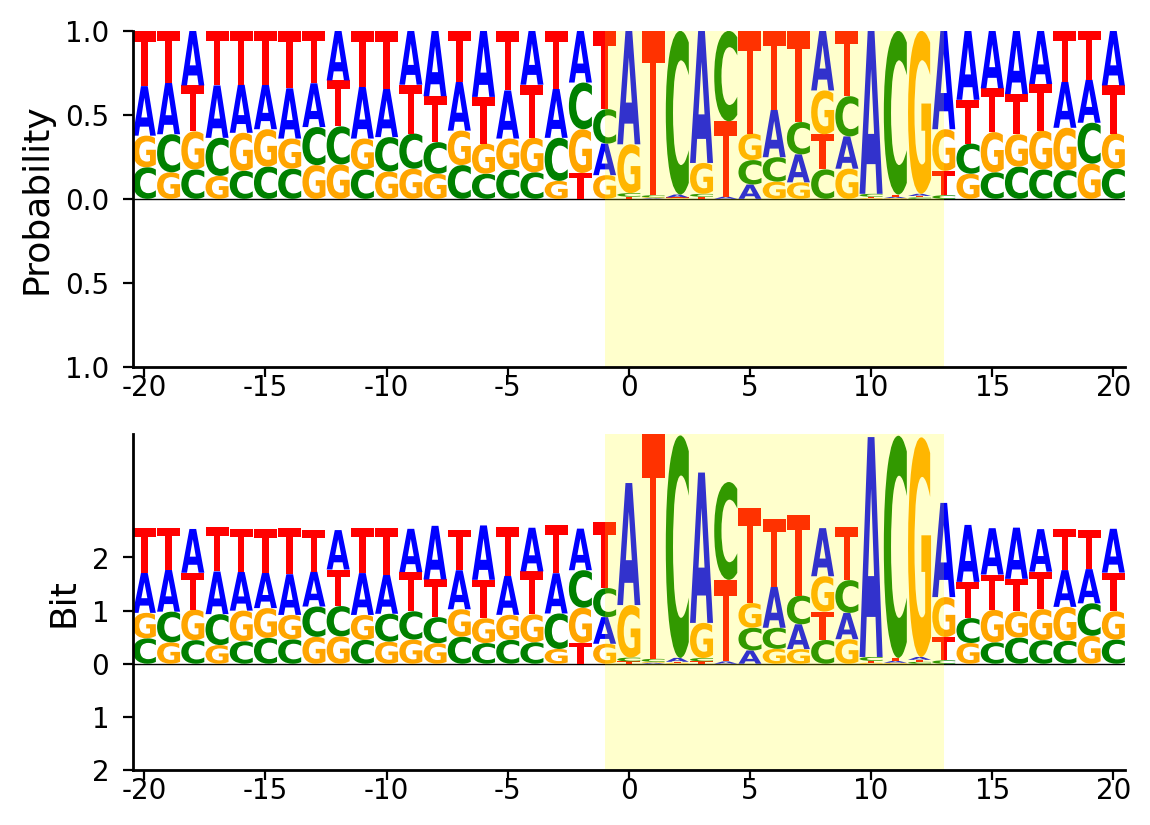

In [6]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_positive_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT',box_color="yellow",box_alpha=0.2)

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    T  G  C  T  T  T  T  A  C  T  ...  C  G  A  A  G  C  C  A  C  A
 1    A  A  G  A  A  G  G  C  A  A  ...  C  G  A  C  A  C  G  G  C  A
 2    G  G  T  T  G  A  A  T  C  G  ...  C  G  A  A  A  C  G  A  C  A
 3    C  T  T  A  T  C  A  T  C  T  ...  C  G  A  T  T  G  T  T  A  T
 4    C  G  C  C  C  A  G  G  T  T  ...  C  G  T  A  G  A  T  C  T  T
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 263  C  C  C  T  T  T  T  T  T  A  ...  C  G  G  A  A  G  C  A  G  A
 264  G  C  T  C  G  C  A  G  C  G  ...  C  G  A  G  C  A  G  C  G  T
 265  G  G  A  G  C  A  A  T  C  A  ...  C  G  G  T  G  C  G  G  C  A
 266  A  G  G  A  C  T  T  T  T  C  ...  C  G  A  A  A  C  T  A  A  C
 267  A  A  T  T  A  A  T  A  A  A  ...  C  G  T  A  C  G  C  A  G  T
 
 [268 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.335821  0.347015  0.317164  0.287313  0.279851  0.

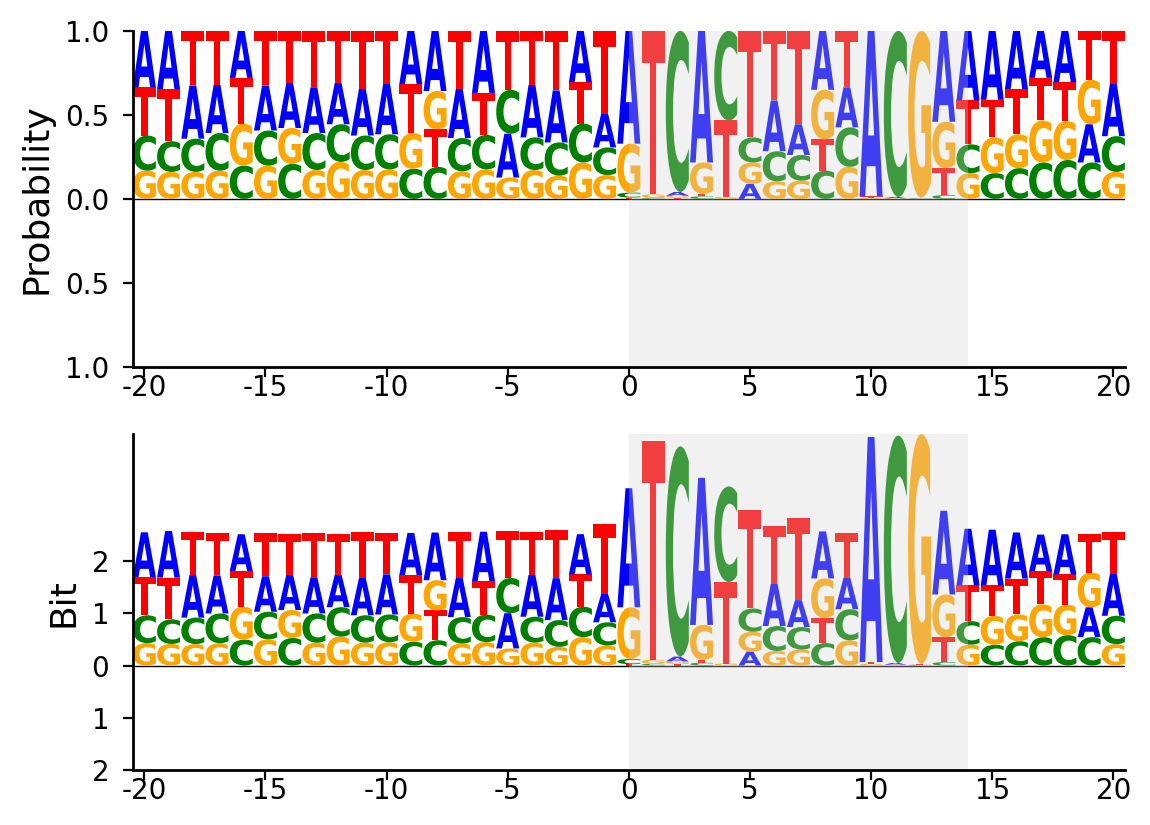

In [7]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',tfs_negative_abf1,40,0,ax['A'],ax['B'],'roman',bases='ACGT')

In [8]:
tfs_abf1

Chromosome   start     end Strand  agree    TF   score        best_seq  \
0        chrIX  254319  254333      +      1  abf1  8.3065  ATCACTCTGTACGG   
4        chrIX  285351  285365      +      0  abf1  8.6038  ATCACCTTACACGG   
5        chrIX   96731   96745      +      0  abf1  7.9350  GTCACCATACACGG   
6        chrIX  261032  261046      +      0  abf1  7.8155  GTCATTAAAAACGA   
7        chrIX  348971  348985      +      0  abf1  8.1406  ATCACATTAGACGG   
..         ...     ...     ...    ...    ...   ...     ...             ...   
491     chrXIV  355627  355641      -      0  abf1  7.6808  CTCACTGGGTACGG   
495     chrXII  704577  704591      -      0  abf1  7.8482  GTCGCGAAGTACGA   
496     chrXVI  339594  339608      -      0  abf1  7.5468  ATCGCGGGCGACGG   
497     chrXVI  118163  118177      -      0  abf1  8.0984  ATAACTTACGACGA   
501      chrVI   95139   95153      -      0  abf1  7.0153  GTAATCTTGAACGT   

     peakVal     pos  
0       1000  254320  
4       1000  285352  
5       1000   96732  
6       1000  261033  
7       1000  348972  
..       ...     ...  
491      123  355641  
495      655  704591  
496     1000  339608  
497     1000  118177  
501       96   95153  

[502 rows x 10 columns]

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    G  G  T  C  A  A  T  C  G  T  ...  C  G  G  G  T  G  G  G  A  G
 1    T  T  G  T  G  A  C  A  C  A  ...  C  G  G  A  A  C  A  T  A  G
 2    C  T  G  C  C  A  A  C  A  A  ...  C  G  G  T  C  A  T  G  C  T
 3    C  A  G  C  A  A  A  G  G  C  ...  C  G  A  A  G  G  T  A  A  G
 4    A  T  T  A  G  A  T  A  T  T  ...  C  G  G  C  T  C  A  T  C  G
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 497  C  C  C  T  T  T  T  T  T  A  ...  C  G  G  A  A  G  C  A  G  A
 498  G  C  T  C  G  C  A  G  C  G  ...  C  G  A  G  C  A  G  C  G  T
 499  G  G  A  G  C  A  A  T  C  A  ...  C  G  G  T  G  C  G  G  C  A
 500  A  G  G  A  C  T  T  T  T  C  ...  C  G  A  A  A  C  T  A  A  C
 501  A  A  T  T  A  A  T  A  A  A  ...  C  G  T  A  C  G  C  A  G  T
 
 [502 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.316733  0.328685  0.320717  0.298805  0.282869  0.

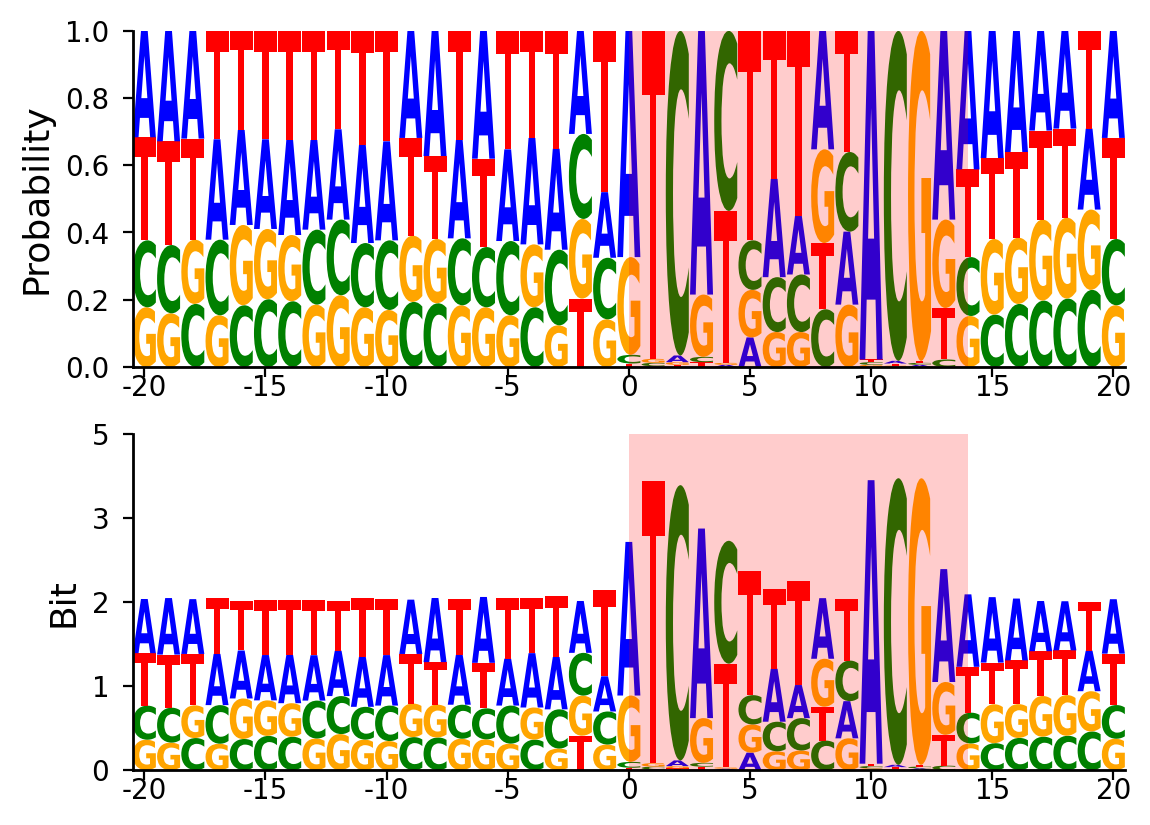

In [10]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',
                           tfs_abf1,
                           40,
                           0,
                           ax['A'],
                           ax['B'],
                           'roman',
                           bases='ACGT',
                           plot_negative_axis=False,
                           box_color="red",
                           box_alpha=0.2)

# Looking at Motif for 1000 peak vals, vs less than 1000 peak vals

In [14]:
tfs_abf1_1000 = tfs_abf1.loc[tfs_abf1['peakVal'] == 1000]
tfs_abf1_less_1000 = tfs_abf1.loc[tfs_abf1['peakVal'] < 1000]

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    G  G  T  C  A  A  T  C  G  T  ...  C  G  G  G  T  G  G  G  A  G
 1    T  T  G  T  G  A  C  A  C  A  ...  C  G  G  A  A  C  A  T  A  G
 2    C  T  G  C  C  A  A  C  A  A  ...  C  G  G  T  C  A  T  G  C  T
 3    C  A  G  C  A  A  A  G  G  C  ...  C  G  A  A  G  G  T  A  A  G
 4    A  T  T  A  G  A  T  A  T  T  ...  C  G  G  C  T  C  A  T  C  G
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 336  T  T  A  C  C  C  A  C  C  A  ...  C  G  A  C  C  A  C  G  C  C
 337  T  T  A  A  G  A  G  C  C  A  ...  C  G  A  G  G  C  C  G  G  A
 338  C  T  A  A  T  T  T  T  C  A  ...  G  T  T  T  T  T  A  T  A  T
 339  G  G  A  G  C  A  A  T  C  A  ...  C  G  G  T  G  C  G  G  C  A
 340  A  G  G  A  C  T  T  T  T  C  ...  C  G  A  A  A  C  T  A  A  C
 
 [341 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.325513  0.346041  0.322581  0.325513  0.293255  0.

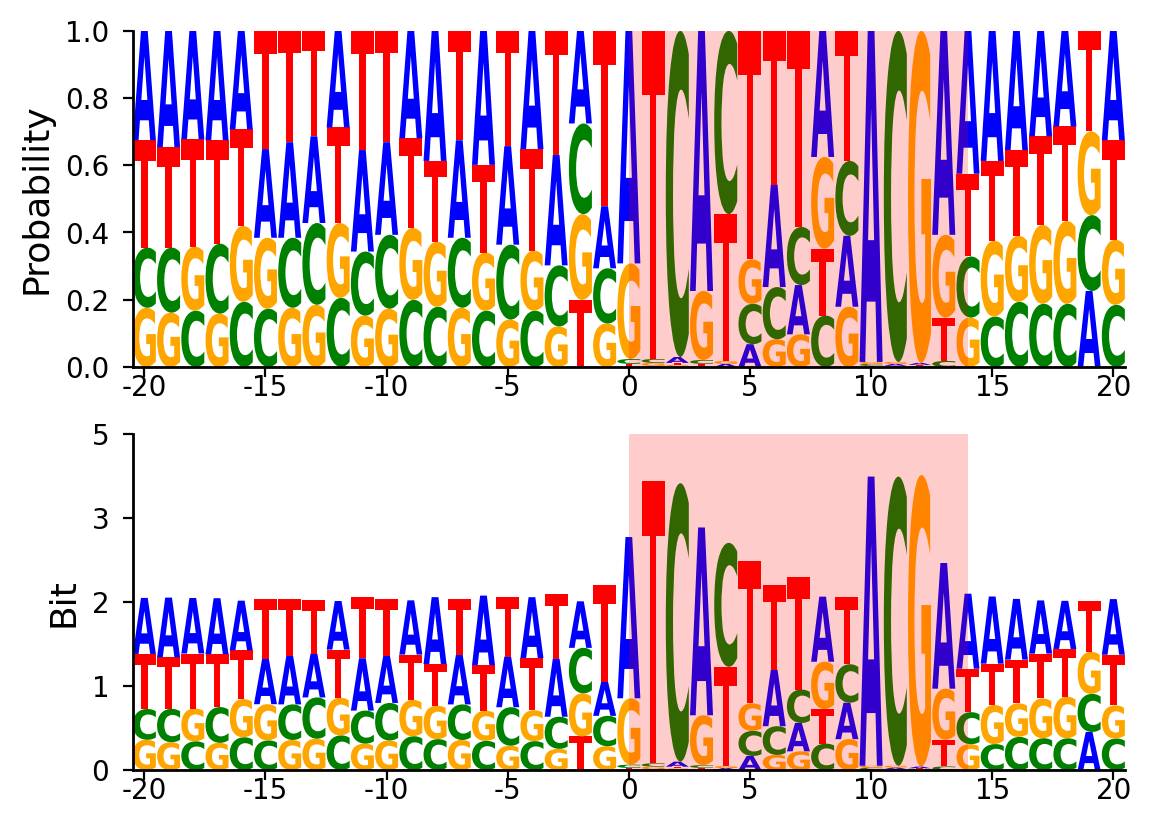

In [15]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',
                           tfs_abf1_1000,
                           40,
                           0,
                           ax['A'],
                           ax['B'],
                           'roman',
                           bases='ACGT',
                           plot_negative_axis=False,
                           box_color="red",
                           box_alpha=0.2)

(    0  1  2  3  4  5  6  7  8  9   ... 31 32 33 34 35 36 37 38 39 40
 0    G  T  A  A  A  A  G  C  A  A  ...  C  G  G  A  C  A  A  A  C  G
 1    T  C  A  T  A  C  T  A  C  G  ...  C  G  T  A  G  A  A  G  A  T
 2    G  G  G  A  T  T  G  A  G  T  ...  C  G  A  T  A  T  T  T  C  T
 3    C  A  T  T  C  C  T  C  C  A  ...  C  G  A  T  G  T  G  T  A  T
 4    A  T  A  A  G  T  C  G  A  A  ...  C  G  A  T  T  A  C  C  A  A
 ..  .. .. .. .. .. .. .. .. .. ..  ... .. .. .. .. .. .. .. .. .. ..
 156  A  A  T  A  G  A  G  A  G  C  ...  C  C  T  T  T  G  G  C  C  T
 157  C  T  A  G  A  A  C  T  T  A  ...  C  G  G  C  A  A  C  G  C  G
 158  C  C  C  T  T  T  T  T  T  A  ...  C  G  G  A  A  G  C  A  G  A
 159  G  C  T  C  G  C  A  G  C  G  ...  C  G  A  G  C  A  G  C  G  T
 160  A  A  T  T  A  A  T  A  A  A  ...  C  G  T  A  C  G  C  A  G  T
 
 [161 rows x 41 columns],
          0         1         2         3         4         5         6   \
 A  0.298137  0.291925  0.316770  0.242236  0.260870  0.

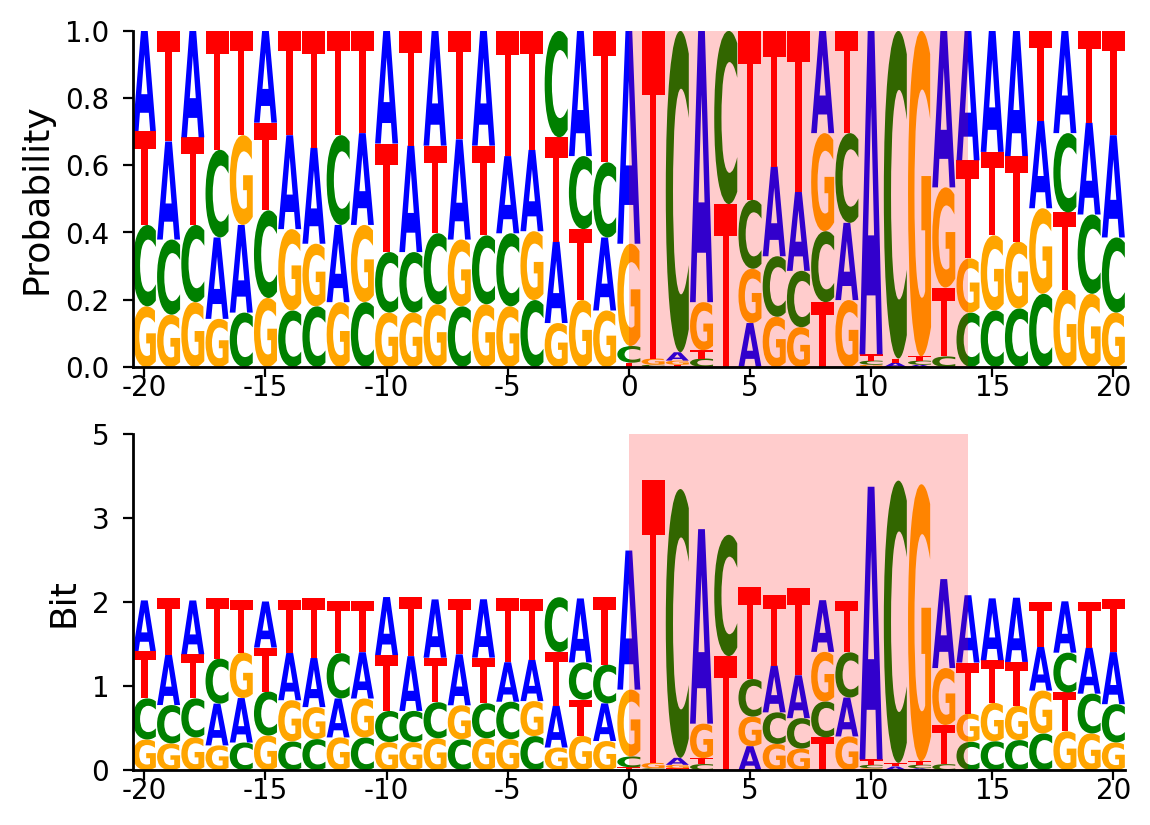

In [16]:
fig, ax = plt.subplot_mosaic("""AAA
                                 BBB""")

plot_utils.plot_motif_logo('/home/rapiduser/programs/RoboCOP/analysis/inputs/SacCer3.fa',
                           tfs_abf1_less_1000,
                           40,
                           0,
                           ax['A'],
                           ax['B'],
                           'roman',
                           bases='ACGT',
                           plot_negative_axis=False,
                           box_color="red",
                           box_alpha=0.2)

In [7]:
# data2 = np.array([[311,   2,   4, 363,   4,  24, 108,  53, 102,  57, 506,   5,   5, 252],
#                  [2967,   15,  139, 3542,   28,  457, 1315,  785, 1609, 1007, 4323, 36,  238, 2448]])

data2 = np.array([[  5, 390,   7,   5, 194, 236, 149, 229,  83, 126,   4,   7,  10,  73],
                 [  38, 4132,  147,   50, 1937, 2606, 1873, 2352,  835, 1551,   35, 116,   71,  607]])



In [9]:
data3 = data2[0]/ data2[1]

In [ ]:
data2 = np.array([2967,   15,  139, 3542,   28,  457, 1315,  785, 1609, 1007, 4323,
         36,  238, 2448])

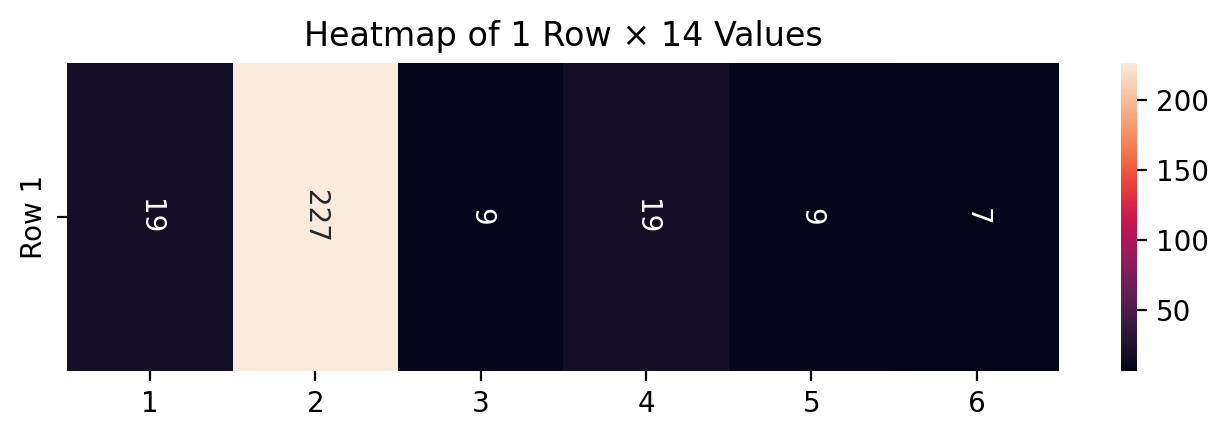

In [24]:


#data = np.array([311, 2, 4, 363, 4, 24, 108, 53, 102, 57, 506, 5, 5, 252])

#data = np.array([  5, 390,   7,   5, 194, 236, 149, 229,  83, 126,   4,   7,  10,  73])

data = np.array([ 19, 227,   9,  19,   9,   7])
#data = np.array([  4,   1,  22,   2, 252,   8])

# reshape into 1 row, 14 columns
heatmap_data = data.reshape(1, -1)
plt.figure(figsize=(8, 2))  # set figure size

ax = sns.heatmap(heatmap_data, annot=True, fmt="d", cbar=True,
            xticklabels=np.arange(1, data.size+1), yticklabels=["Row 1"])

for text in ax.texts:
    text.set_rotation(270)   # 0 = horizontal

plt.title("Heatmap of 1 Row × 14 Values")
plt.show()


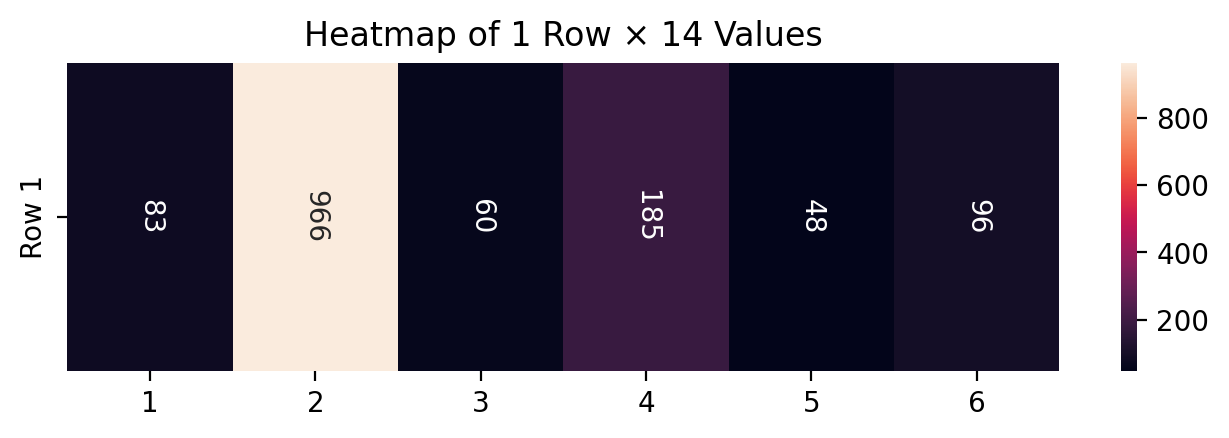

In [28]:


#data1 = np.array([2967,   15,  139, 3542,   28,  457, 1315,  785, 1609, 1007, 4323, 36,  238, 2448])
#data1 = np.array([  38, 4132,  147,   50, 1937, 2606, 1873, 2352,  835, 1551,   35, 116,   71,  607])

data1 = np.array([ 83, 966,  60, 185,  48,  96])
#data1 = np.array([ 102,   22,  125,    5, 1009,   69])
# reshape into 1 row, 14 columns
heatmap_data = data1.reshape(1, -1)
plt.figure(figsize=(8, 2))  # set figure size


ax = sns.heatmap(heatmap_data, annot=True, fmt="d", cbar=True,
            xticklabels=np.arange(1, data1.size+1), yticklabels=["Row 1"])

for text in ax.texts:
    text.set_rotation(270)   # 0 = horizontal

plt.title("Heatmap of 1 Row × 14 Values")
plt.show()



In [29]:
data3 = data/ data1

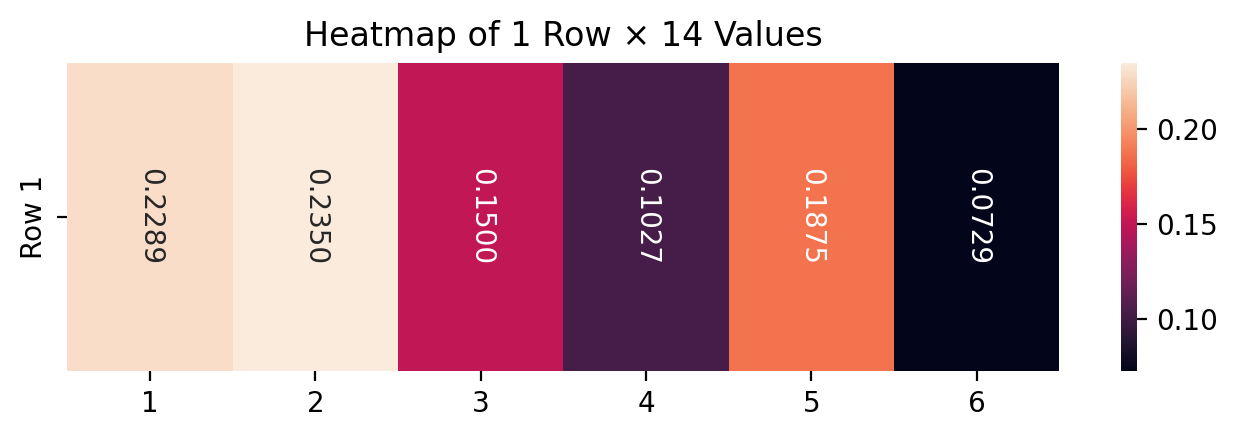

In [30]:



# reshape into 1 row, 14 columns
heatmap_data = data3.reshape(1, -1)

plt.figure(figsize=(8, 2))  # set figure size
ax = sns.heatmap(heatmap_data, annot=True, fmt=".4f", cbar=True,
            xticklabels=np.arange(1, data.size+1), yticklabels=["Row 1"])

for text in ax.texts:
    text.set_rotation(270)   # 0 = horizontal

plt.title("Heatmap of 1 Row × 14 Values")
plt.show()

